# 1. Carry out descriptive analytics on the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\USER\\Downloads\\dataset w7.csv")
df

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


In [20]:
df['Test preparation'].value_counts()

none         21
completed     7
Name: Test preparation, dtype: int64

<AxesSubplot:>

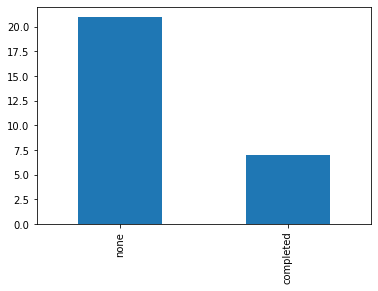

In [21]:
df['Test preparation'].value_counts().plot(kind='bar')

People who have completed the test preparation is less compared to those who have not completed it.

In [36]:
df.groupby(['Gender','Test preparation'])['Test preparation'].count()

Gender  Test preparation
female  completed            4
        none                12
male    completed            3
        none                 9
Name: Test preparation, dtype: int64

<AxesSubplot:xlabel='Gender,Test preparation'>

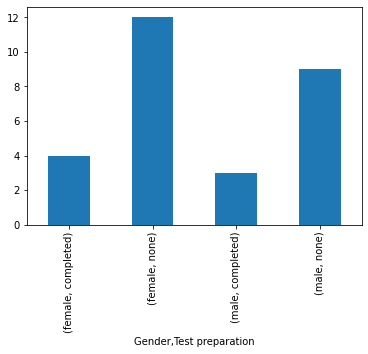

In [38]:
df.groupby(['Gender','Test preparation'])['Test preparation'].count().plot(kind='bar')

Among the people who have completed test preparation, number of females is more.

In [46]:
df.groupby('Gender', as_index=False).mean()

,Gender,Total Marks
0,female,33.750000
1,male,30.416667


<AxesSubplot:>

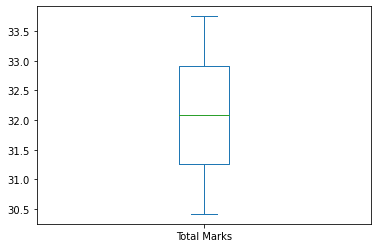

In [52]:
df.groupby('Gender', as_index=False).mean().plot(kind='box')

In [54]:
df.groupby('Test preparation')['Total Marks'].describe()

,count,mean,std,min,25%,50%,75%,max
Test preparation,,,,,,,,
completed,7.0,44.571429,3.359422,40.0,43.0,44.0,46.0,50.0
none,21.0,28.238095,11.661495,12.0,18.0,27.0,38.0,48.0


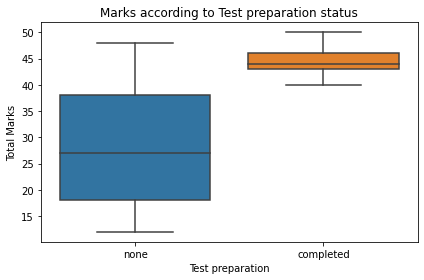

In [57]:
sns.boxplot(data=df, x='Test preparation',y ='Total Marks')
plt.title("Marks according to Test preparation status")
plt.ylabel("Total Marks")
plt.tight_layout()

Effectiveness of Test preparation is clearly vissible from the graph

# 2. Check whether female and male students scored the same marks.

In [58]:
#H0 : Female and Male scored different marks
#Ha : Female and Male scored the same marks

In [63]:
from scipy.stats import ttest_ind
alpha=0.05
fem=df[df['Gender']=='female']['Total Marks']
mal=df[df['Gender']=='male']['Total Marks']
_,p=ttest_ind(fem,mal)
print("p = ",p)
if p> alpha:
    print ('Failing to reject the Null Hypothesis,H0')
else:
    print('Rejecting the Null Hypothesis,H0')

p =  0.4937822317960763
Failing to reject the Null Hypothesis,H0


Based on the testing carried out on the given data, we are failing to reject the null hypothesis. Hence, male and female students scored different marks in the test.

# 3. Whether test preparation helps the students

In [64]:
#H0 : Test preparation did not help the students
#Ha : Test preparation helped the students

In [68]:
non=df[df['Test preparation']=='none']['Total Marks']
comp=df[df['Test preparation']=='completed']['Total Marks']
alpha=0.05
_,p=ttest_ind(non,comp)
print("p = ",p)
if p> alpha:
    print ('Failing to reject the Null Hypothesis,H0')
else:
    print('Rejecting the Null Hypothesis,H0')

p =  0.0012671292457320106
Rejecting the Null Hypothesis,H0


Based on the testing carried out on the given data, we are rejecting the null hypothesis. Hence, test preparation helped the students